In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("3Electric and Alternative Fuel Charging Stations.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_4792\3542126059.py:1: DtypeWarning: Columns (6,16,20,31,33,36,39,40,41,43,46,52,53,55,57,58,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("3Electric and Alternative Fuel Charging Stations.csv")


In [ ]:
# Configure the display option to show all columns.
pd.set_option('display.max_columns', None)

During the feature selection process for our analysis, strategic decisions were made to focus the study on key and relevant information, eliminating columns that displayed ambiguity, lack of specificity, or contributed little relevance to the analysis's objective. The choice of selected columns was based on the need to optimize and ensure meaningful interpretation of the results.

Attention was directed towards variables that provide a more detailed and enlightening insight into the distribution of charging stations, their specific characteristics, and their potential impact on the adoption of alternative fuel vehicles.

In [3]:
df = dataset[["Fuel Type Code", "Street Address", "City", "State", "Status Code", 
                     "Groups With Access Code", "Access Days Time", "BD Blends", 
                     "NG Fill Type Code", "NG PSI", "Latitude", "Longitude", 
                     "Open Date", "NG Vehicle Class", "E85 Blender Pump", 
                     "EV Connector Types", 
                     "CNG Storage Capacity"]]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fuel Type Code           70406 non-null  object 
 1   Street Address           70405 non-null  object 
 2   City                     70406 non-null  object 
 3   State                    70406 non-null  object 
 4   Status Code              70406 non-null  object 
 5   Groups With Access Code  70406 non-null  object 
 6   Access Days Time         66628 non-null  object 
 7   BD Blends                1217 non-null   object 
 8   NG Fill Type Code        1603 non-null   object 
 9   NG PSI                   1597 non-null   object 
 10  Latitude                 70406 non-null  float64
 11  Longitude                70406 non-null  float64
 12  Open Date                69310 non-null  object 
 13  NG Vehicle Class         1780 non-null   object 
 14  E85 Blender Pump      

It represents the majority of charging stations, with an impressive 86.5%.
The high proportion suggests significant growth and acceptance of electric vehicles in the area covered by the data.
Presence of Alternative Fuels:

E85 (ethanol) contributes 6.4%, indicating a certain degree of diversity in alternative fuels used at charging stations.
Propane (LPG) and Compressed Natural Gas (CNG) have similar shares of around 2.7% and 2.3%, respectively.
Biodiesel (BD) and LNG:

Biodiesel (BD) represents 1.7%, while Liquefied Natural Gas (LNG) and Hydrogen (HY) have lower shares of approximately 0.2% each.
These less common options suggest developing infrastructure for vehicles using these fuels.
Sustainable and Environmental Focus:

The predominance of electric and ethanol options may indicate a growing preference for more sustainable and environmentally friendly vehicles.
Overall, the distribution of fuel types suggests a trend towards electrification, but there is also diversity that may be relevant for the transition to cleaner and more sustainable energy sources.

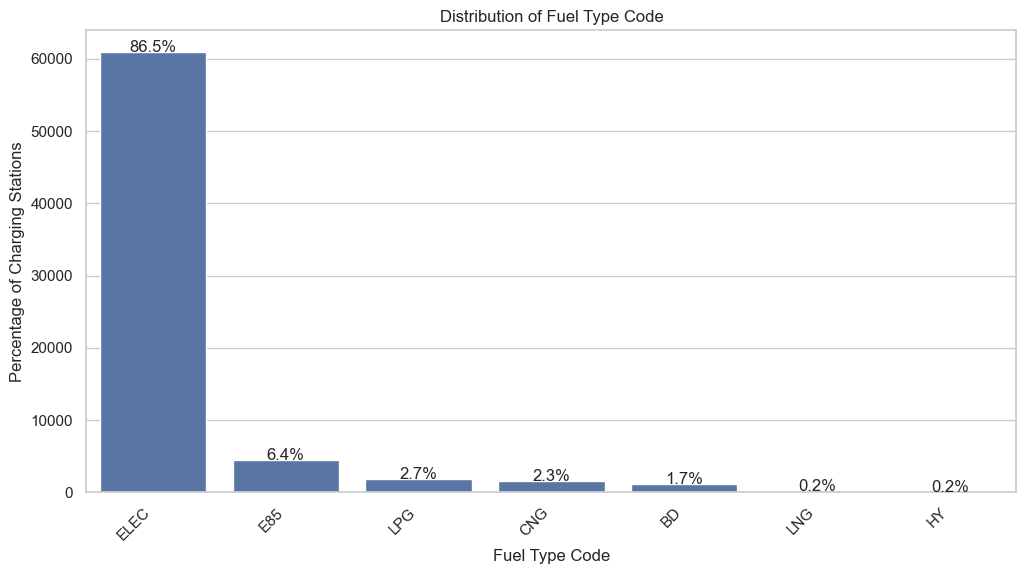

In [5]:
# Set the style for the charts
sns.set(style="whitegrid")

# Bar chart for the distribution of Fuel Type Code with percentages
plt.figure(figsize=(12, 6))
total_stations = len(df)  # Total number of stations

# Use countplot to count and display percentages
sns.countplot(data=df, x='Fuel Type Code', order=df['Fuel Type Code'].value_counts().index)

# Calculate and display percentages on the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height/total_stations:.1%}', ha='center')

plt.title('Distribution of Fuel Type Code')
plt.xlabel('Fuel Type Code')
plt.ylabel('Percentage of Charging Stations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for clarity
plt.show()


The cities of Los Angeles and San Diego in California, along with Montreal in Canada, stand out for having the highest number of alternative energy stations.

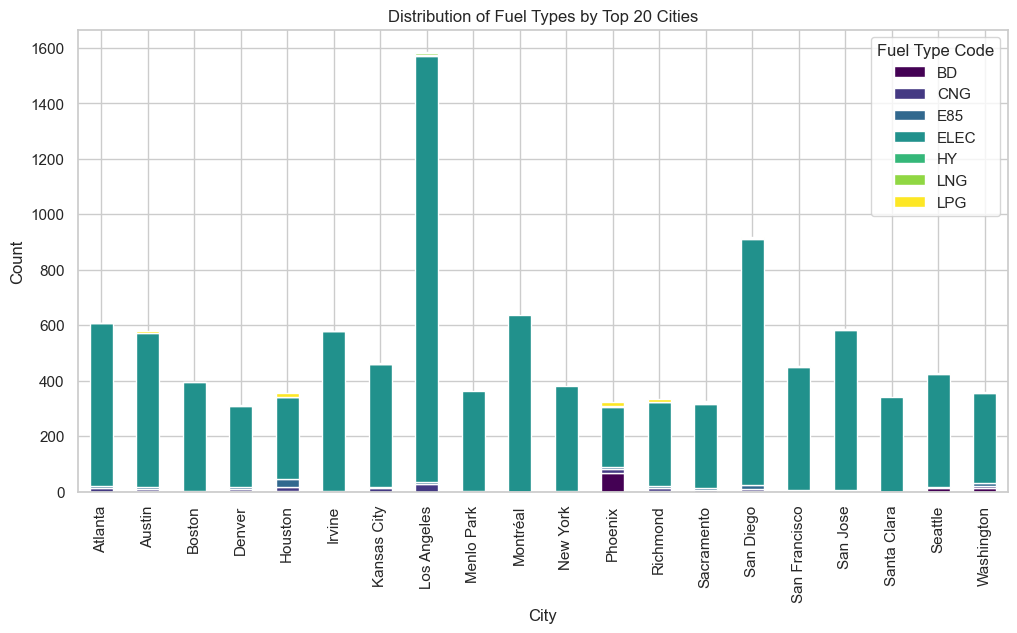

In [6]:
# Get the top 20 cities by the number of stations
top_cities = df['City'].value_counts().head(20).index

# Filter the DataFrame to include only the top 20 cities
df_top_cities = df[df['City'].isin(top_cities)]

# Count the frequency of each fuel type by city in the filtered DataFrame
fuel_city_counts_top = df_top_cities.groupby(['City', 'Fuel Type Code']).size().unstack()

# Create a grouped bar chart
fuel_city_counts_top.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types by Top 20 Cities')
plt.legend(title='Fuel Type Code')

plt.show()


California leads by a significant margin in the adoption of alternative energy sources, followed by the state of New York.

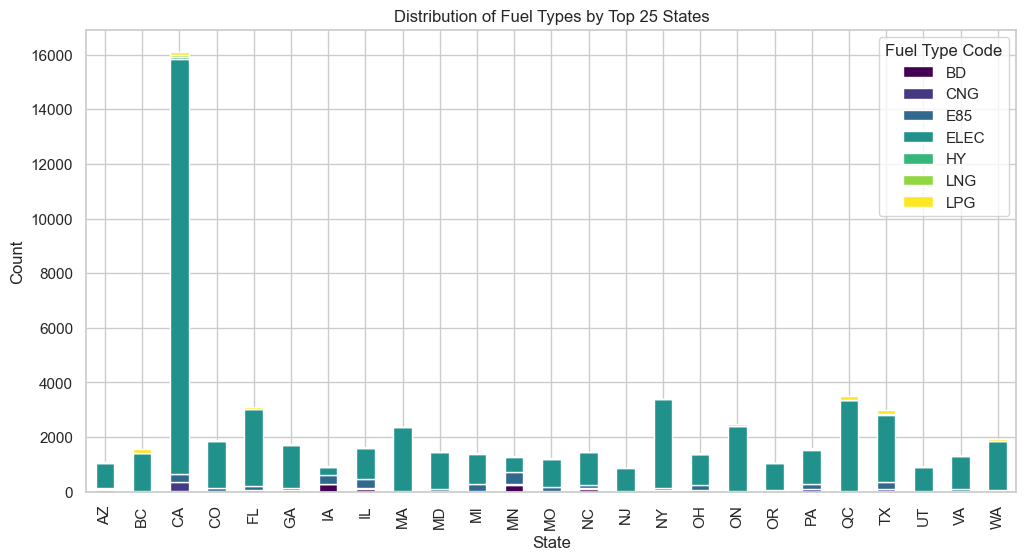

In [8]:
# Get the top 25 entities (states) by the number of stations
top_states = df['State'].value_counts().head(25).index

# Filter the DataFrame to include only the top 25 states
df_top_states = df[df['State'].isin(top_states)]

# Count the frequency of each fuel type by state in the filtered DataFrame
fuel_state_counts_top = df_top_states.groupby(['State', 'Fuel Type Code']).size().unstack()

# Create a grouped bar chart
fuel_state_counts_top.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types by Top 25 States')
plt.legend(title='Fuel Type Code')

plt.show()

The chart clearly shows that California is the undisputed leader in the adoption of electric charging stations for vehicles.

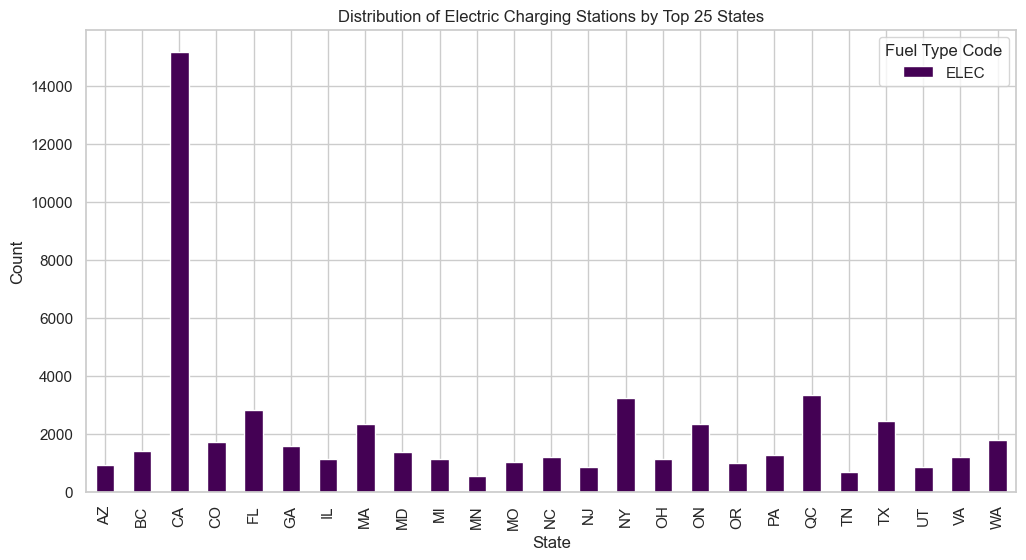

In [9]:
# Filter the DataFrame to include only electric charging stations (ELEC)
df_elec = df[df['Fuel Type Code'] == 'ELEC']

# Get the top 25 entities (states) by the number of electric charging stations
top_states_elec = df_elec['State'].value_counts().head(25).index

# Filter the DataFrame to include only the top 25 states with electric charging stations
df_top_states_elec = df_elec[df_elec['State'].isin(top_states_elec)]

# Count the frequency of each fuel type by state in the filtered DataFrame (only ELEC)
fuel_state_counts_top_elec = df_top_states_elec.groupby(['State', 'Fuel Type Code']).size().unstack()

# Create a grouped bar chart
fuel_state_counts_top_elec.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Electric Charging Stations by Top 25 States')
plt.legend(title='Fuel Type Code')

plt.show()


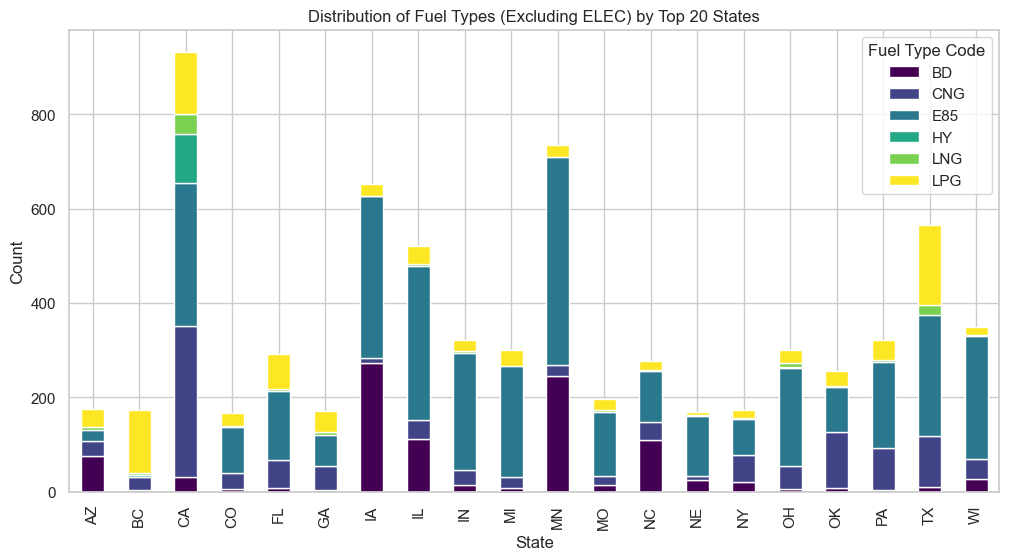

In [10]:
# Filter the DataFrame to exclude electric charging stations (ELEC)
df_no_elec = df[df['Fuel Type Code'] != 'ELEC']

# Get the top 20 entities (states) by the number of stations (excluding ELEC)
top_states_no_elec = df_no_elec['State'].value_counts().head(20).index

# Filter the DataFrame without ELEC to include only the top 20 states
df_top_states_no_elec = df_no_elec[df_no_elec['State'].isin(top_states_no_elec)]

# Count the frequency of each fuel type by state in the filtered DataFrame (excluding ELEC)
fuel_state_counts_top_no_elec = df_top_states_no_elec.groupby(['State', 'Fuel Type Code']).size().unstack()

# Create the grouped bar chart
fuel_state_counts_top_no_elec.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Fuel Types (Excluding ELEC) by Top 20 States')
plt.legend(title='Fuel Type Code')

plt.show()


The analysis of the percentage distribution of different fuel types at charging stations is as follows:

ELEC (Electricity): 86.51%

Electricity is the dominant energy source at charging stations, accounting for over 86% of the total.
This high percentage suggests significant adoption of electric vehicles compared to other alternative fuel types.
E85 (85% Ethanol): 6.40%

Although in a smaller proportion than electricity, E85 has a considerable presence.
It may indicate some interest in biofuels, although not as prevalent as electricity.
LPG (Liquefied Petroleum Gas): 2.65%

Liquefied Petroleum Gas occupies a significant space but is less common than the two previous types.
There is likely demand for vehicles using liquefied gas as an energy source.
CNG (Compressed Natural Gas): 2.32%

Compressed Natural Gas has a similar representation to LPG.
It may indicate a growing infrastructure for vehicles using natural gas.
BD (Biodiesel): 1.73%

Biodiesel has a minor presence compared to other energy sources.
There may be limited adoption of vehicles using biodiesel compared to other technologies.
LNG (Liquefied Natural Gas): 0.22%

Liquefied Natural Gas has minimal presence at charging stations.
It may suggest limited adoption of vehicles using liquefied natural gas.
HY (Hydrogen): 0.17%

Hydrogen has the smallest representation among fuel types.
The infrastructure for hydrogen vehicles may be in the early stages of development.

In [12]:
# Get the frequency of each category in 'Fuel Type Code'
fuel_type_counts = df['Fuel Type Code'].value_counts()

# Calculate the percentages
fuel_type_percentages = fuel_type_counts / len(df) * 100

# Create a DataFrame with the results
fuel_type_table = pd.DataFrame({
    'Fuel Type': fuel_type_percentages.index,
    'Percentage': fuel_type_percentages.values
})

# Sort the table by percentage in descending order
fuel_type_table = fuel_type_table.sort_values(by='Percentage', ascending=False)

# Display the table
print(fuel_type_table)


  Fuel Type  Percentage
0      ELEC   86.508252
1       E85    6.402863
2       LPG    2.651763
3       CNG    2.316564
4        BD    1.729966
5       LNG    0.224413
6        HY    0.166179


C:\Users\DELL\AppData\Local\Temp\ipykernel_4792\2331595859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open Date'] = pd.to_datetime(df['Open Date'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4792\2331595859.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open Year'] = df['Open Date'].dt.year


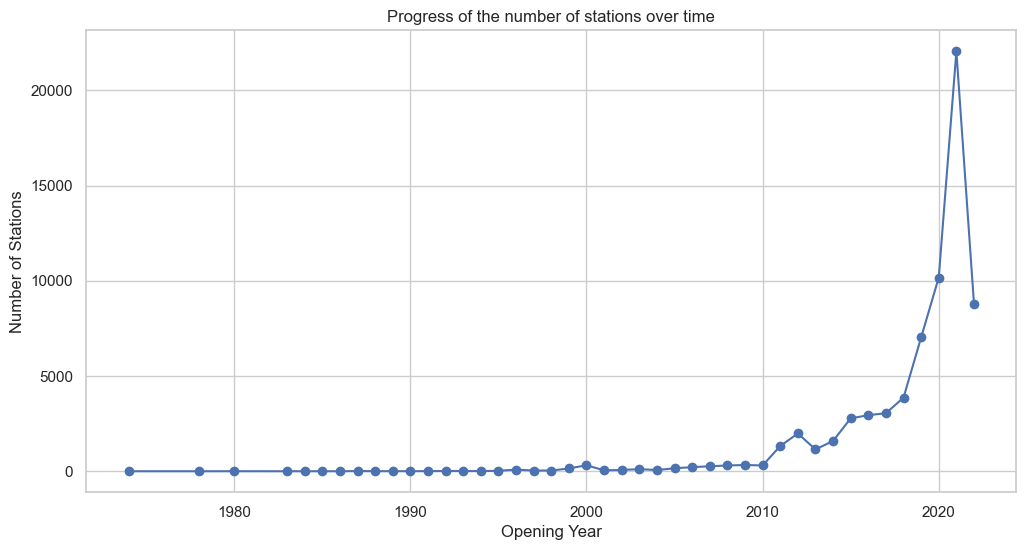

In [13]:
# Convert the 'Open Date' column to date format
df['Open Date'] = pd.to_datetime(df['Open Date'], errors='coerce')

# Extract the year from the 'Open Date' column
df['Open Year'] = df['Open Date'].dt.year

# Count the number of stations opened per year
stations_by_year = df['Open Year'].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(stations_by_year.index, stations_by_year.values, marker='o', linestyle='-')
plt.xlabel('Opening Year')
plt.ylabel('Number of Stations')
plt.title('Progress of the number of stations over time')
plt.grid(True)
plt.show()


The analysis of the charging station count by year from 2010 reveals a clear increase in the implementation of charging stations for electric vehicles. Here are some key observations:

Sustained Growth: Throughout the years, there is sustained growth in the number of charging stations from 2010 to 2022.

Acceleration in Recent Years: A significant increase is notable from 2019, with strong growth in 2020 and 2021. This surge may indicate a growing interest in electric vehicle charging infrastructure.

2021 as a Boom Year: The year 2021 shows a drastic increase, more than doubling the number of charging stations compared to the previous year (2020).

Possible Influence of Policies and Market: The rise in the adoption of charging stations may be related to government policies, incentives, and the increasing market demand for electric vehicles.

In [14]:
# Convert the 'Open Date' column to datetime
df['Open Date'] = pd.to_datetime(df['Open Date'], errors='coerce')

# Create a new column 'Year' with the opening year
df['Year'] = df['Open Date'].dt.year

# Filter stations opened from 2010 onwards
df_since_2010 = df[df['Year'] >= 2010]

# Count the number of stations per year
station_count_by_year = df_since_2010['Year'].value_counts().sort_index()

# Create a DataFrame with the results
station_count_by_year_df = pd.DataFrame({'Year': station_count_by_year.index, 'Station Count': station_count_by_year.values})

# Display the table
print(station_count_by_year_df)


      Year  Station Count
0   2010.0            305
1   2011.0           1325
2   2012.0           1984
3   2013.0           1148
4   2014.0           1589
5   2015.0           2778
6   2016.0           2944
7   2017.0           3048
8   2018.0           3864
9   2019.0           7026
10  2020.0          10170
11  2021.0          22048
12  2022.0           8792


C:\Users\DELL\AppData\Local\Temp\ipykernel_4792\2265690452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open Date'] = pd.to_datetime(df['Open Date'], errors='coerce')
C:\Users\DELL\AppData\Local\Temp\ipykernel_4792\2265690452.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Open Date'].dt.year


This graph illustrates the evolution in the implementation of alternative energy stations, with the first referring to electric charging stations and the second to stations utilizing other fuel sources.

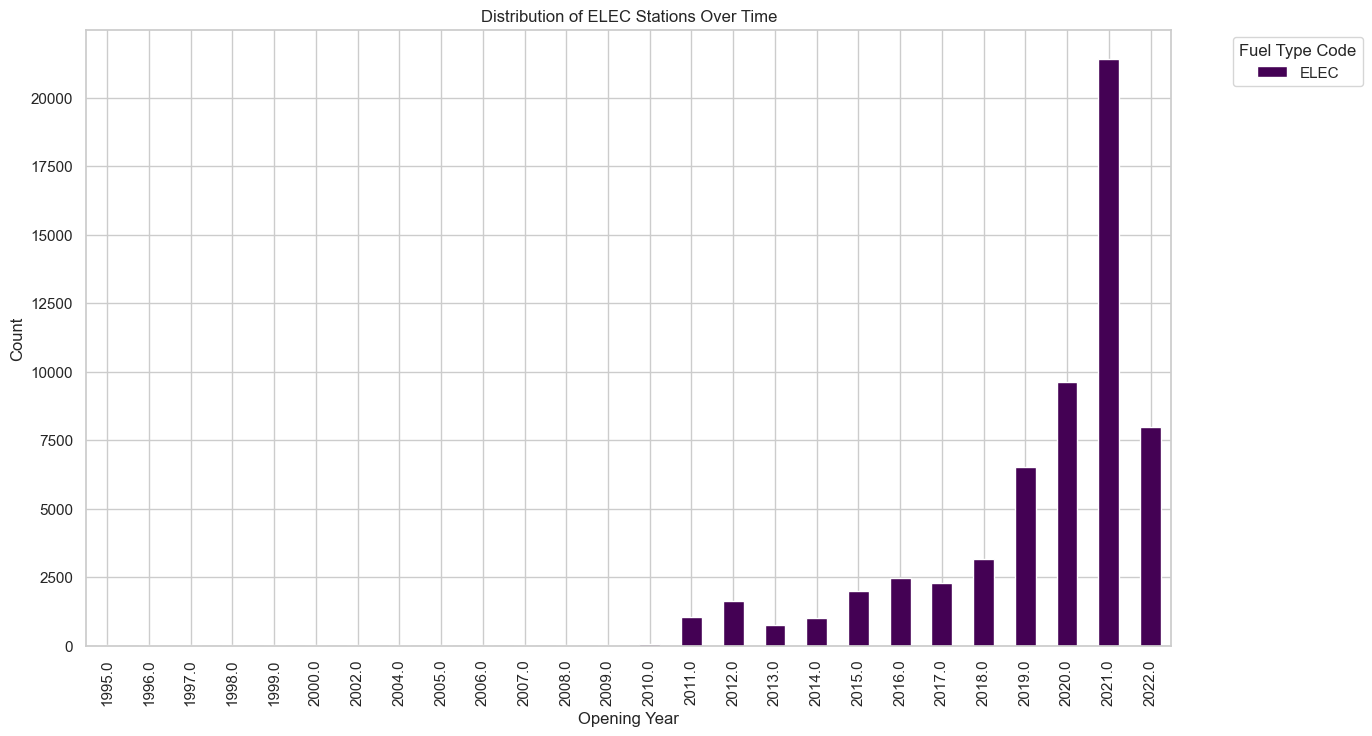

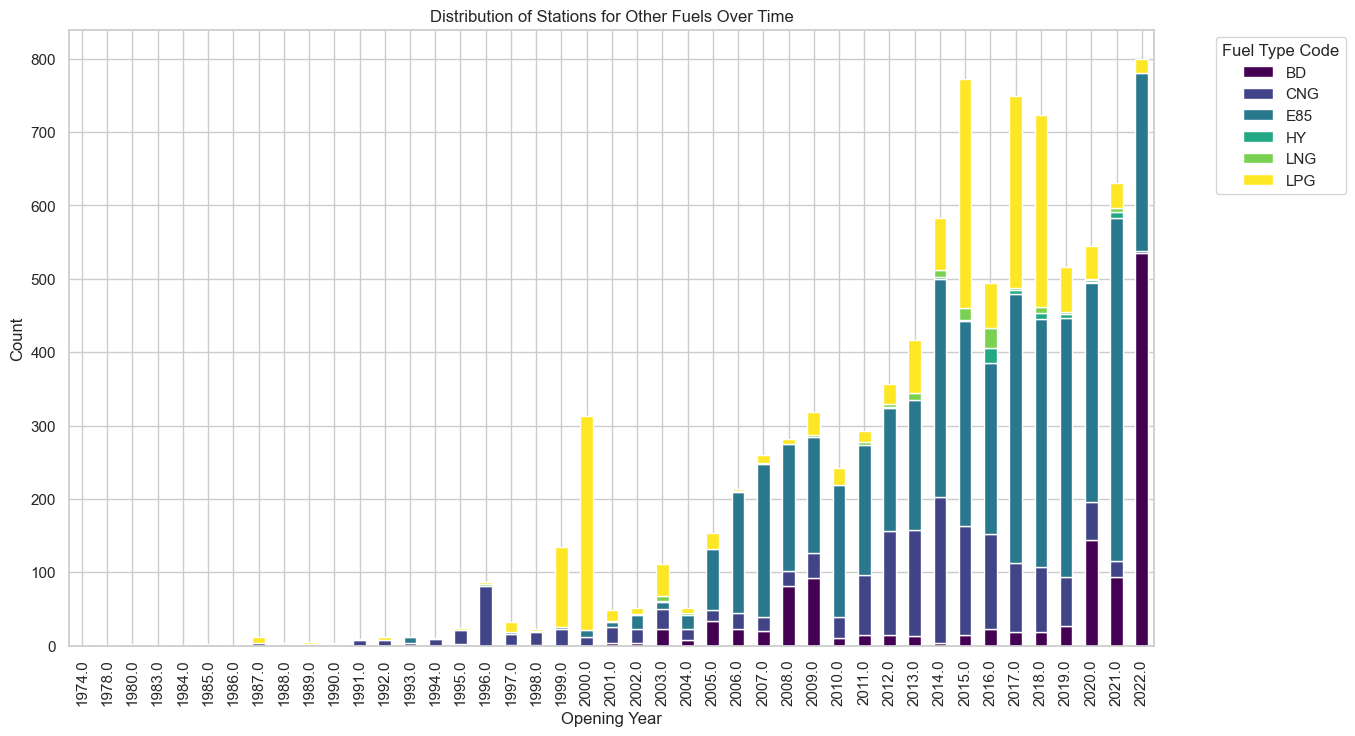

In [15]:
# Filter for ELEC
df_elec = df[df['Fuel Type Code'] == 'ELEC']

# Filter for other fuels
df_other_fuels = df[df['Fuel Type Code'] != 'ELEC']

# Create a graph for ELEC
fuel_date_counts_elec = df_elec.groupby([df_elec['Open Date'].dt.year, 'Fuel Type Code']).size().unstack()
fuel_date_counts_elec.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.xlabel('Opening Year')
plt.ylabel('Count')
plt.title('Distribution of ELEC Stations Over Time')
plt.legend(title='Fuel Type Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Create a graph for other fuels
fuel_date_counts_other_fuels = df_other_fuels.groupby([df_other_fuels['Open Date'].dt.year, 'Fuel Type Code']).size().unstack()
fuel_date_counts_other_fuels.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.xlabel('Opening Year')
plt.ylabel('Count')
plt.title('Distribution of Stations for Other Fuels Over Time')
plt.legend(title='Fuel Type Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The vehicle category that predominantly utilizes natural gas is the 'heavy-duty' category, with an approximate ratio of 6 to 1 compared to other categories.

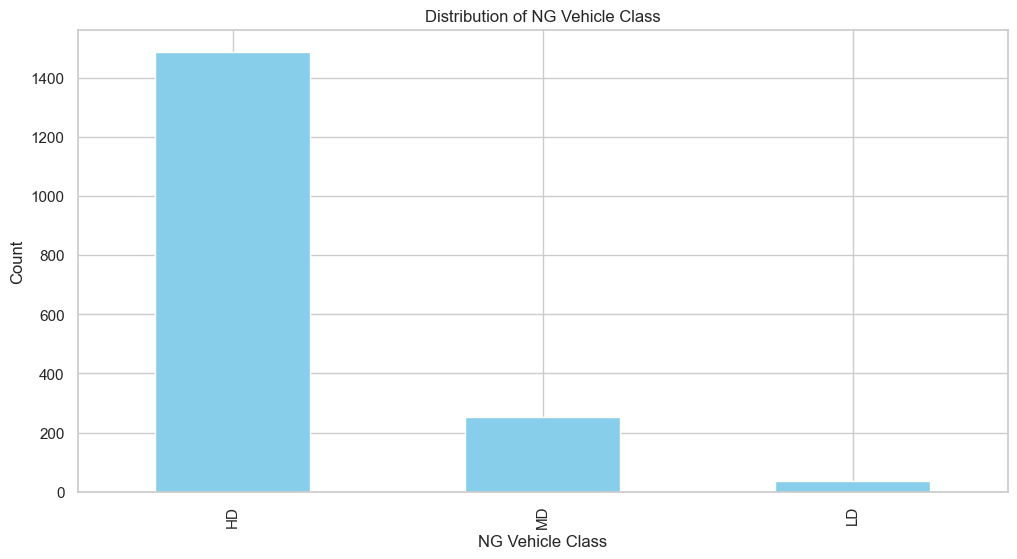

In [16]:
# Get the count of each category in 'NG Vehicle Class'
ng_vehicle_class_counts = df['NG Vehicle Class'].value_counts()

plt.figure(figsize=(12, 6))
ng_vehicle_class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('NG Vehicle Class')
plt.ylabel('Count')
plt.title('Distribution of NG Vehicle Class')
plt.show()

In this graph, we can see the natural gas storage capacity in different stations.

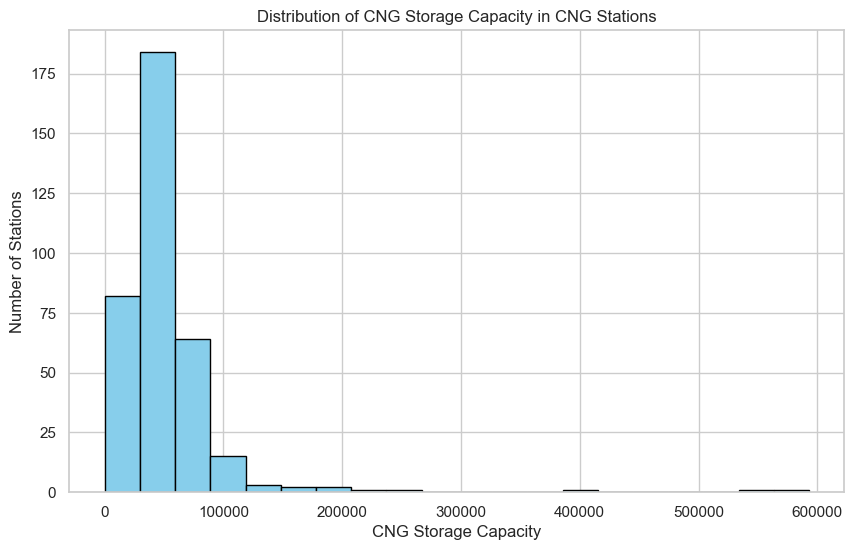

In [17]:
# Filter the DataFrame to include only stations with CNG storage capacity
df_cng = df[df['Fuel Type Code'] == 'CNG']

# Create a histogram of CNG storage capacity
plt.figure(figsize=(10, 6))
plt.hist(df_cng['CNG Storage Capacity'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('CNG Storage Capacity')
plt.ylabel('Number of Stations')
plt.title('Distribution of CNG Storage Capacity in CNG Stations')
plt.show()
